In [11]:
import pandas as pd
import numpy as np

import cv2
import glob
from PIL import Image

import matplotlib.pyplot as plt

In [ ]:
# function to read images from path
def read_images(path):
    return [cv2.imread(file) for file in glob.glob(path)]

In [13]:
def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, int(((size - x) / 2), int((size - y) / 2)))
    return new_im

In [3]:
path_yes = './brain-mri-images-for-brain-tumor-detection/yes/*'
path_no = './brain-mri-images-for-brain-tumor-detection/no/*'

images_yes = read_images(path_yes)
images_no = read_images(path_no)

numpy.ndarray

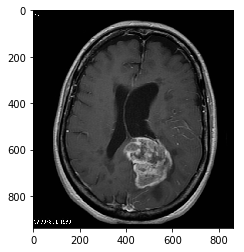

In [4]:
plt.imshow(images_yes[1])
type(images_yes[1])

In [14]:
im = make_square(images_yes[1])
plt.imshow(im)

TypeError: 'int' object is not iterable

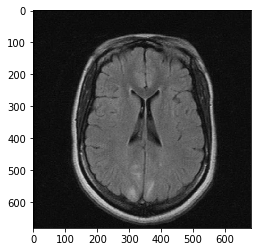

In [5]:
plt.imshow(images_no[1])

In [6]:
# se supone que esto transforma la imagen a escala de grises, pero no parece.
# vamos a obviar este paso de momento, ya que todas las imágenes que tengo ya están en escala de grises.
def img_to_gray_scale(list_of_images):
    return [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in list_of_images]

<class 'numpy.ndarray'>


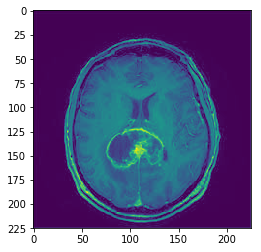

In [7]:
images_gray_scale = img_to_gray_scale(images_yes)
plt.imshow(images_gray_scale[0])
print(type(images_gray_scale[0]))

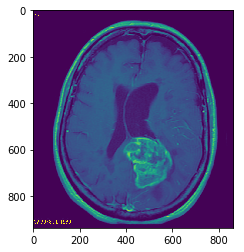

In [8]:
plt.imshow(images_gray_scale[1])

In [9]:
img = pd.DataFrame(images_yes[1])
img

ValueError: Must pass 2-d input

In [ ]:
def median_filter(list_of_images):
    return [cv2.medianBlur(img,9) for img in list_of_images]

In [ ]:
# function to transform list of images to b&w
# I get the element 1 because it returs a tuple (threshold, image)
# meaning of the threshold: 0 is black, 255 is white, so I set that the pixels which are below 127
# turn black, and the ones that are above 127 turn white
def images_to_bw(list_of_images):
    return [cv2.threshold(img, 135, 255, cv2.THRESH_BINARY)[1] for img in list_of_images]

In [ ]:
images_yes_mf = median_filter(images_yes)
images_no_mf = median_filter(images_no)

In [ ]:
plt.imshow(images_yes_mf[1])

In [ ]:
images_yes_bw = images_to_bw(images_yes_mf)
images_no_bw = images_to_bw(images_no_mf)

In [ ]:
plt.imshow(images_yes_bw[1])

In [ ]:
plt.imshow(images_no_bw[1])

In [ ]:
#img = images_yes_bw[1]
#img = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
#img = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

In [ ]:
# plt.imshow(img)